In [16]:
import requests
import json
#import geojson
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
#from matplotlib.collections import PatchCollection
#from matplotlib.patches import Polygon

%matplotlib inline

proxies = {'http':''}

recon_time = 80
seedpoints = '75,25,85,25'
time_min = 0
time_max = 100
time_step = 2
fixplate = 0
movplate = 501

times = np.arange(time_min,time_max+0.1,time_step)

# Send Request for coastlines
r = requests.get('http://127.0.0.1:8000/reconstruct/motion_path/?time=%0.2f&seedpoints=%s&timespec=%s&fixplate=%d&movplate=%s' % \
                 (recon_time,seedpoints,'%s,%s,%s' % (time_min,time_max,time_step),fixplate,movplate),
                 proxies=proxies)
mp = json.loads(r.text)

#print mp


{u'type': u'FeatureCollection', u'features': [{u'geometry': {u'distance': [33.23, 33.24, 33.25, 33.25, 33.26, 26.42, 94.85, 95.18, 85.51, 84.29, 85.75, 91.64, 155.81, 162.46, 162.04, 163.47, 248.19, 262.89, 276.43, 293.89, 349.79, 351.43, 352.6, 313.41, 257.69, 208.72, 208.42, 208.1, 108.72, 95.63, 88.92, 88.69, 88.45, 85.77, 94.14, 82.08, 81.63, 81.19, 80.75, 81.02, 105.49, 105.23, 104.96, 104.69, 98.46, 82.42, 82.03, 81.63, 81.24, 80.84], u'type': u'Polyline', u'coordinates': [[[53.52, -28.43], [53.71, -28.19], [53.9, -27.94], [54.1, -27.7], [54.29, -27.45], [54.47, -27.2], [54.33, -27.4], [54.34, -26.55], [54.3, -25.69], [54.61, -24.98], [55.01, -24.31], [55.4, -23.63], [55.86, -22.92], [56.92, -21.92], [57.96, -20.83], [58.97, -19.72], [59.99, -18.61], [61.22, -16.71], [62.43, -14.65], [63.26, -12.3], [63.75, -9.7], [63.95, -6.56], [63.95, -3.4], [63.87, -0.23], [63.84, 2.59], [64.02, 4.9], [64.63, 6.67], [65.23, 8.45], [65.83, 10.23], [65.99, 11.19], [66.13, 12.04], [66.79, 12.51]

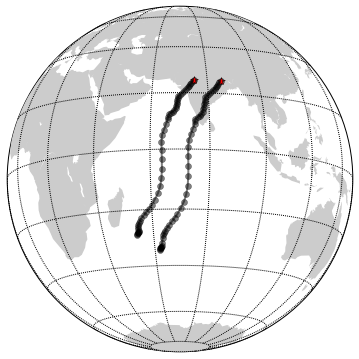

In [19]:
fig = plt.figure(figsize=(6,6))
ax_map = fig.add_axes([0,0,0.8,1.0])
m = Basemap(resolution='c',projection='ortho',lon_0=70.,lat_0=-10,ax=ax_map)
m.drawparallels(np.arange(-80.,90,20.))
m.drawmeridians(np.arange(0.,360.,20.))

m.fillcontinents()

for feature in mp['features']:
    coords = feature['geometry']['coordinates']
    xy = zip(*coords[0])
    x,y = m(xy[0],xy[1])
    m.plot(x,y,'-ko',linewidth=2,zorder=2,alpha=0.5)
    m.plot(x[-1],y[-1],'r*',zorder=3,markersize=8)
    
plt.show()


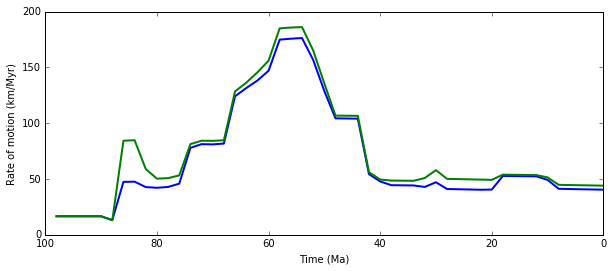

In [20]:
fig = plt.figure(figsize=(10,4))

for feature in mp['features']:
    
    Dist = feature['geometry']['distance']
    # Get rate of motion as distance per Myr
    Rate = np.asarray(Dist)/2

    # Note that the motion path coordinates come out starting with the oldest time and working forwards
    # So, to match our 'times' array, we flip the order
    Rate = np.flipud(Rate)

    plt.plot(times[:-1],Rate,linewidth=2)

plt.xlabel('Time (Ma)')
plt.ylabel('Rate of motion (km/Myr)')
plt.gca().invert_xaxis()
plt.show()


    

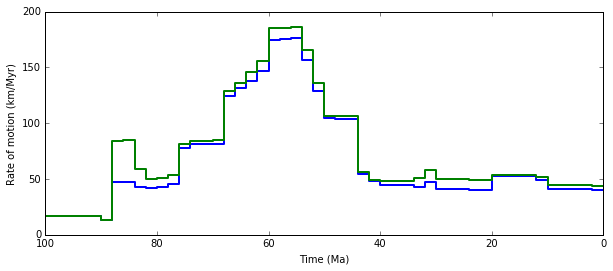

In [4]:
fig = plt.figure(figsize=(10,4))

for feature in mp['features']:
    Dist = feature['geometry']['distance']
    # Get rate of motion as distance per Myr
    Rate = np.asarray(Dist)/2

    # Note that the motion path coordinates come out starting with the oldest time and working forwards
    # So, to match our 'times' array, we flip the order
    Rate = np.flipud(Rate)
    StepRate = np.zeros(len(Rate)*2)
    StepRate[::2] = Rate
    StepRate[1::2] = Rate

    StepTime = np.zeros(len(Rate)*2)
    StepTime[::2] = times[:-1]
    StepTime[1::2] = times[1:]
    plt.plot(StepTime,StepRate,linewidth=2)

plt.xlabel('Time (Ma)')
plt.ylabel('Rate of motion (km/Myr)')
plt.gca().invert_xaxis()
plt.show()
